In [1]:
#Created: 24Jan2022
#Author: Lynn Menchaca

#Resources
#Ken Jee - Data Science Project from Scratch series
#https://www.youtube.com/playlist?list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t

#import Glassdoor_Scraper.py as gs
import Glassdoor_Scraper as gs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#chrome driver path
path = "/Users/lynnpowell/Documents/Drivers/chromedriver"

In [2]:
#def get_jobs(keyword, num_jobs, verbose, path, slp_time):
#df = gs.get_jobs('data scientist',1500, False, path, 10)

In [3]:
#df.to_csv('Data_Science_Jobs.csv')
#df.to_csv('/Users/lynnpowell/Documents/DS_Projects/DS_Salary_Project/Data_Science_Jobs.csv')

raw_data_file_path = '/Users/lynnpowell/Documents/DS_Projects/DS_Salary_Project/Data_Science_Jobs_NoDescription.csv'
data_file_path = '/Users/lynnpowell/Documents/DS_Projects/DS_Salary_Project/Salary_Data_Clean_NoDescription.csv'
df_out = pd.read_csv(data_file_path)
df = df_out.drop(['Unnamed: 0'], axis = 1)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Hourly,Employer_Provided,Min_Salary,Max_Salary,Avg_Salary,Company_txt,Job_State,Age
0,Data Scientist,$59K - $128K (Glassdoor est.),Data Science,3.2,"7-Eleven, Inc.\n3.2","Irving, TX",-1,10000+ Employees,1927.0,Company - Private,...,$1 to $2 billion (USD),-1,0,0,59,128,93.5,"7-Eleven, Inc.",TX,93.0
1,Data Scientist,Employer Provided Salary:$160K - $175K,Data Science,4.3,American Capital Group\n4.3,"Bellevue, WA",-1,51 to 200 Employees,1986.0,Company - Private,...,Unknown / Non-Applicable,-1,0,0,160,175,167.5,American Capital Group,WA,34.0
2,Data Scientist,Employer Provided Salary:$95K,Data Science,-1.0,AdVon Commerce,"Dublin, OH",-1,-1,-1.0,-1,...,-1,-1,0,0,95,95,95.0,AdVon Commerce,OH,-1.0
3,Data Scientist,Employer Provided Salary:$140K - $150K,Data Science,-1.0,Health Data Analytics Institute,"Dedham, MA",-1,-1,-1.0,-1,...,-1,-1,0,0,140,150,145.0,Health Data Analytics Institute,MA,-1.0
4,Senior Data Scientist,Employer Provided Salary:$70 Per Hour,Data Science,-1.0,Tror,Remote,-1,-1,-1.0,-1,...,-1,-1,1,0,70,70,70.0,Tror,Remote,-1.0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_txt', 'Job_State', 'Age'],
      dtype='object')

In [5]:
#More data cleaning and Feature Engineering:
#Job title and seniority
#Fix state Los Angeles
#Job Description length
#competitor count
#hourly wage to annual
#remove new line from job title

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
    


In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    1235
na                  60
mle                 49
director            39
analyst             28
manager              1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        918
senior    476
jr         18
Name: seniority, dtype: int64

In [10]:
#Fix state Los Angeles
#I don't have this problem with my data
#Following steps just in case I did
#df.Job_State.value_counts()
df['Job_State'] = df.Job_State.apply(lambda x: x.strip() if x.strip().lower != 'los angeles' else 'CA')
df.Job_State.value_counts()

#if accedently create a new column
#axis = 1 -> columns
#df.drop('job state', inplace = True, axis =1)

Remote    473
WA        160
MA        129
CA        115
TX        106
MD        102
FL         56
NY         48
NE         38
AZ         37
CO         33
MO         25
SC         22
GA         17
OH          9
AL          8
DC          8
OR          5
IL          4
CT          4
VA          3
MN          2
DE          2
NJ          2
MI          2
TN          1
MT          1
Name: Job_State, dtype: int64

In [11]:
#Job Description length
#I don't have real data in this column
#df['desc_len'] = df['Job Description'].apply(lambda X: len(x))
#df['desc_len']

In [12]:
#competitor count
#I was not able to scrape any data for this
df['Competitors'].value_counts()
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)
df['num_comp'] = df['Competitors'].apply(lambda x: 0 if x == -1 else len(x.split(',')))
df['num_comp'].value_counts()

0    1412
Name: num_comp, dtype: int64

In [13]:
#hourly wage to annual
#Look at data first
#It looks like the hourly salary is already calculated for anual
#df[df.Hourly == 1][['Hourly','Min_Salary','Max_Salary']]

#8 hrs/day * 5 days/week * 52 weeks/year = 2080 hrs/year
# annual wage = hourly wage * 2080 hrs/year
#I'm not sure why * 2
df['Min_Salary_hr'] = df.apply(lambda x: x.Min_Salary*2 if x.Hourly == 1 else x.Min_Salary, axis = 1)
df['Max_Salary_hr'] = df.apply(lambda x: x.Max_Salary*2 if x.Hourly == 1 else x.Max_Salary, axis = 1)
df[df.Hourly == 1][['Hourly','Min_Salary_hr','Min_Salary','Max_Salary_hr','Max_Salary']]
#It looks like the hourly salary is already calculated for anual

,Hourly,Min_Salary_hr,Min_Salary,Max_Salary_hr,Max_Salary
4,1,140,70,140,70
576,1,160,80,180,90
578,1,192,96,192,96
1126,1,192,96,192,96
1128,1,108,54,108,54
1130,1,160,80,180,90
1148,1,192,96,192,96
1150,1,108,54,108,54
1152,1,160,80,180,90
1170,1,192,96,192,96


In [14]:
#remove new line from job title
#I did this in my previous cleaning file
#but just in case I missed this step
#df['Company_txt'] = df.Company_txt.apply(lambda x: x.replace('\n',''))
df['Company_txt']

0                        7-Eleven, Inc.
1                American Capital Group
2                        AdVon Commerce
3       Health Data Analytics Institute
4                                  Tror
                     ...               
1407                        CyberCoders
1408                   Northrop Grumman
1409           National Security Agency
1410                             Indeed
1411                             Indeed
Name: Company_txt, Length: 1412, dtype: object

In [15]:
#Starting to dive in to the data
df.describe()

,Rating,Headquarters,Founded,Competitors,Hourly,Employer_Provided,Min_Salary,Max_Salary,Avg_Salary,Age,num_comp,Min_Salary_hr,Max_Salary_hr
count,1412.000000,1412.0,1408.000000,1412.0,1412.000000,1412.0,1412.000000,1412.000000,1412.000000,1408.000000,1412.0,1412.000000,1412.000000
mean,1.903187,-1.0,1305.061790,-1.0,0.029745,0.0,106.646601,150.187677,128.417139,29.928267,0.0,108.938385,152.578612
std,2.447318,0.0,935.913388,0.0,0.169943,0.0,45.150529,45.038776,42.878719,42.824262,0.0,45.825646,43.709614
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.0,54.000000,54.000000,54.000000,-1.000000,0.0,55.000000,55.000000
25%,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.0,65.000000,109.000000,87.000000,-1.000000,0.0,65.000000,109.000000
50%,3.600000,-1.0,1942.000000,-1.0,0.000000,0.0,92.000000,140.000000,105.000000,16.000000,0.0,92.000000,140.000000
75%,4.000000,-1.0,2001.000000,-1.0,0.000000,0.0,160.000000,175.000000,167.500000,36.000000,0.0,160.000000,175.000000
max,5.000000,-1.0,2020.000000,-1.0,1.000000,0.0,223.000000,324.000000,273.500000,192.000000,0.0,223.000000,324.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_txt', 'Job_State', 'Age', 'job_simp', 'seniority', 'num_comp',
       'Min_Salary_hr', 'Max_Salary_hr'],
      dtype='object')

<AxesSubplot:>

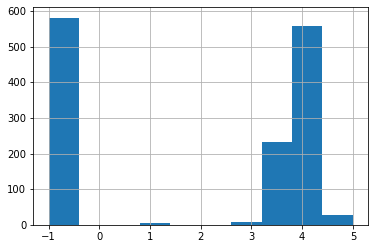

In [17]:
#likes to start with histograms
df.Rating.hist()
#This looks like a fairly normal distribution for values that are not -1

<AxesSubplot:>

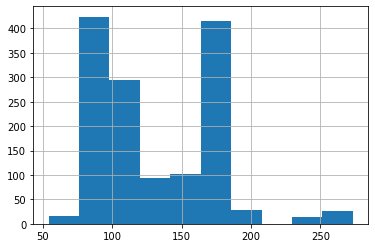

In [18]:
df.Avg_Salary.hist()

<AxesSubplot:>

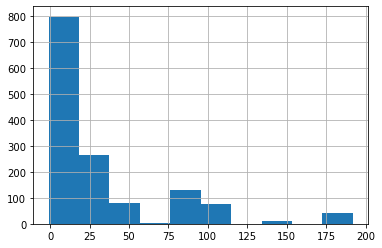

In [19]:
df.Age.hist()
#age is nevery normally distributed it falls in exponetial distribution
#To use this with our data we would have to normalize it especially if we were using a regression

In [20]:
#I don't have in my data
#Ken's results followed a normal distribution around 4000 charaters
#df.desc_len.hist()

<AxesSubplot:>

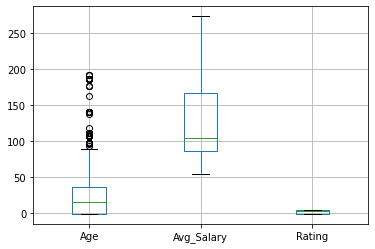

In [21]:
#Box Plots
#df.Avg_Salary.boxplot() -> bad code
df.boxplot(column = ['Age','Avg_Salary','Rating'])
#The box plots do not appear to be normalized
#There are high out liers in the Age category comming from old companies that have been around for a long time

<AxesSubplot:>

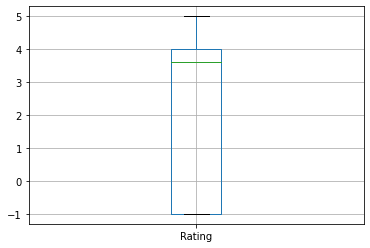

In [22]:
df.boxplot(column = 'Rating')
#It is covering all the way down to -1 for those that have no ratings

<AxesSubplot:>

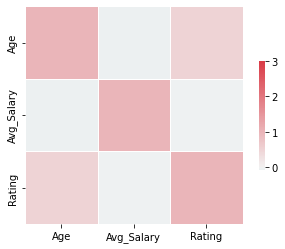

In [23]:
#General Plan
#Look at the correlation of continuous variables
#googled -> corrplot in seaborn
df[['Age','Avg_Salary','Rating']].corr()
#controls colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Plot heatmap
sns.heatmap(df[['Age','Avg_Salary','Rating']].corr(), vmax=3, center=0, cmap=cmap,
           square = True, linewidths = 0.5, cbar_kws={"shrink":0.5})
#Using heat map to see what is closely or negatively correlated
#strongest correlation is between age and rating

In [24]:
#Diving in to categorical variables
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'Job_State', 'job_simp', 'seniority']]

graph for Location: total = 60


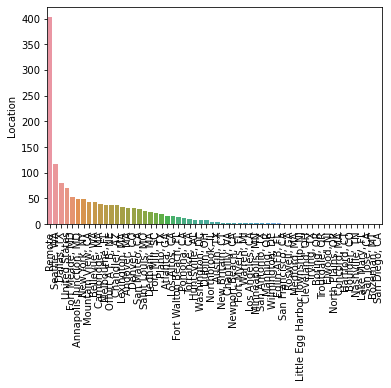

graph for Size: total = 9


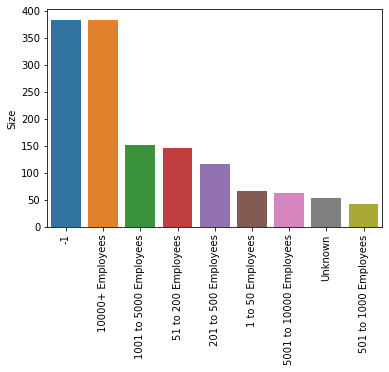

graph for Type of ownership: total = 8


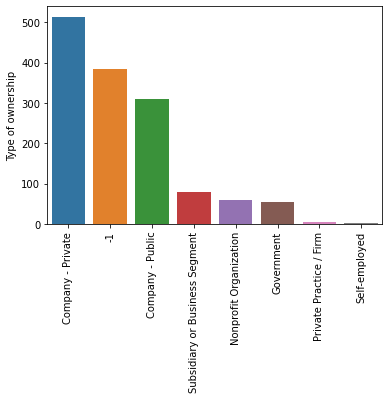

graph for Industry: total = 38


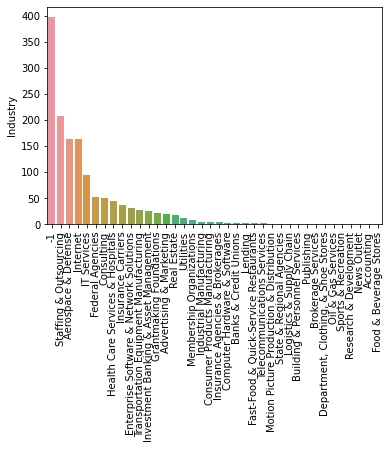

graph for Sector: total = 19


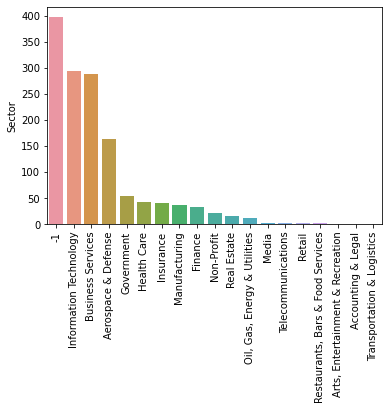

graph for Revenue: total = 14


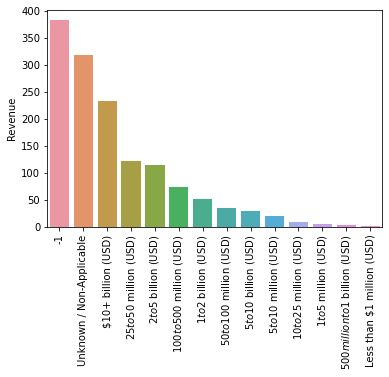

graph for Company Name: total = 107


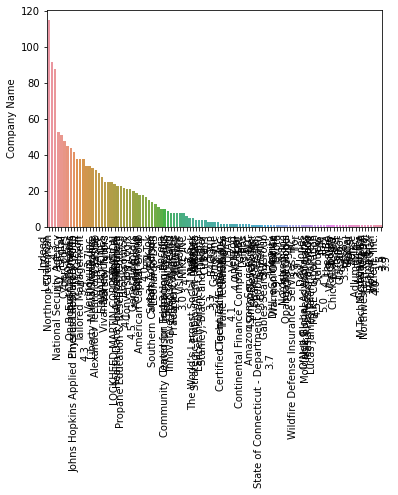

graph for Job_State: total = 27


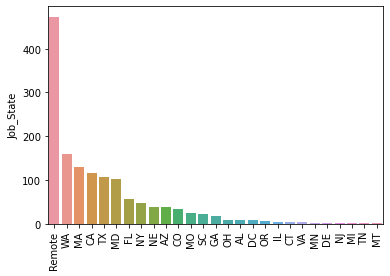

graph for job_simp: total = 6


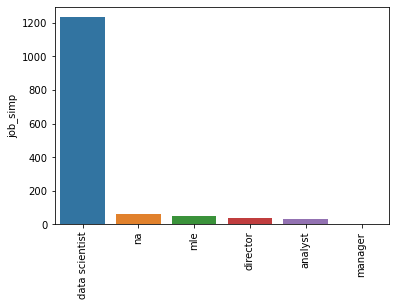

graph for seniority: total = 3


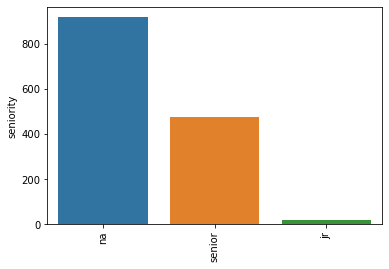

In [25]:
#Loop to make a bar chart for each categorical column
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


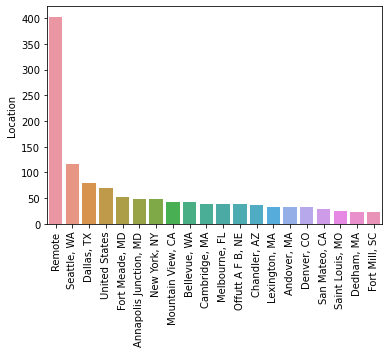

graph for Company Name: total = 20


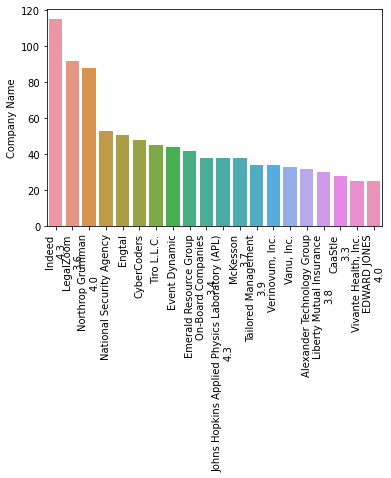

In [30]:
#Looking at the long lists
for i in ['Location','Company Name']:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [33]:
pd.pivot_table(df, index = 'job_simp', values = 'Avg_Salary')

,Avg_Salary
job_simp,
analyst,143.339286
data scientist,126.472065
director,156.730769
manager,105.000000
mle,144.367347
na,130.450000


In [34]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'Avg_Salary')

Avg_Salary
job_simp       seniority            
analyst        jr         105.000000
               senior     144.759259
data scientist jr         158.558824
               na         126.151495
               senior     125.806236
director       na         156.730769
manager        na         105.000000
mle            na         144.367347
na             na         130.450000

In [50]:
#To see how many rows I can display
#pd.options.display.max_rows

#To display full data frame
pd.set_option('display.max_rows', None)

#pd.pivot_table(df, index = ['Job_State','job_simp'], values = 'Avg_Salary').sort_values('Avg_Salary',ascending = False)
pd.pivot_table(df, index = ['Job_State','job_simp','seniority'], values = 'Avg_Salary', aggfunc = 'count').sort_values('Job_State',ascending = False)

Avg_Salary
Job_State job_simp       seniority            
WA        mle            na                  1
          data scientist senior             78
                         na                 81
VA        data scientist na                  3
TX        data scientist senior             55
                         na                 36
                         jr                 15
TN        data scientist na                  1
SC        data scientist na                 22
Remote    director       na                 39
          analyst        senior             11
          data scientist na                224
                         senior            116
          manager        na                  1
          mle            na                 39
          na             na                 43
OR        data scientist senior              5
OH        data scientist na                  9
NY        mle            na                  1
          data scientist senior              1
                         na                 29
                         jr                  1
          analyst        senior             16
NJ        data scientist senior              2
NE        data scientist na                 38
MT        data scientist na                  1
MO        data scientist na                 22
          mle            na                  3
MN        data scientist senior              1
                         na                  1
MI        data scientist na                  2
MD        na             na                 15
          data scientist senior             26
                         na                 61
MA        mle            na                  1
          data scientist senior             39
                         na                 89
IL        data scientist na                  4
GA        na             na                  2
          data scientist senior              2
                         na                 13
FL        data scientist senior             51
                         na                  4
          mle            na                  1
DE        data scientist na                  2
DC        data scientist na                  8
CT        data scientist senior              3
                         na                  1
CO        data scientist na                 32
          analyst        jr                  1
CA        mle            na                  3
          data scientist senior             47
                         na                 64
                         jr                  1
AZ        data scientist senior             23
                         na                 14
AL        data scientist na                  8

In [41]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Job_State', values = 'Avg_Salary').sort_values('Avg_Salary',ascending = False)

,Avg_Salary
Job_State,
MI,167.500000
OH,163.333333
MO,152.681818
GA,151.566667
NY,148.967742
WA,147.814465
AZ,146.770270
DE,146.250000
DC,145.875000


In [ ]:
#Interesting Findings
#States with Data Science and Data Engineer have a higher average salary
#Data Scientists and Data Engineers get more bang for there buck taking a job in MI vs a job in CA or NY
#I don't know why the JR position is higher pay for data scientists, 
#  it might be becuase of the high cost of living cities looking for data scientist junoir positions.

In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_txt', 'Job_State', 'Age', 'job_simp', 'seniority', 'num_comp',
       'Min_Salary_hr', 'Max_Salary_hr'],
      dtype='object')

In [48]:
#Looking at all the categorical table using pivot tables
#rating, industry, sector, revenu, number of comp, hourly, employer provided, 
#python, r, spark, aws, excel, desc_len, type of ownership
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','Hourly','Employer_Provided','Type of ownership','Avg_Salary']]

In [53]:
#Difference between pivot andd pivot table
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False))

Rating
        Avg_Salary
Rating            
 3.0    169.687500
 4.5    150.022727
 4.3    142.528169
 4.2    133.630435
-1.0    131.192771
 3.8    128.069767
 3.6    128.033981
 3.3    125.968750
 5.0    123.000000
 4.0    122.062842
 3.7    121.402174
 3.4    112.771739
 4.1    108.500000
 4.9    102.500000
 3.5    100.900000
 1.0     99.875000
 3.9     94.206349
 3.2     93.500000
 2.9     55.000000
Industry
                                          Avg_Salary
Industry                                            
Real Estate                               169.558824
Logistics & Supply Chain                  167.500000
Building & Personnel Services             167.500000
Membership Organizations                  161.812500
Grantmaking Foundations                   151.452381
Advertising & Marketing                   149.125000
Investment Banking & Asset Management     147.560000
Internet                                  144.826220
Utilities                                 139.136364
-1

ValueError: Grouper for 'Avg_Salary' not 1-dimensional

In [56]:
#pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Type of ownership', values = 'Avg_Salary', aggfunc = 'count')

Type of ownership,-1,Company - Private,Company - Public,Government,Nonprofit Organization,Private Practice / Firm,Self-employed,Subsidiary or Business Segment
Revenue,,,,,,,,
$1 to $2 billion (USD),NaN,1.0,NaN,NaN,37.0,NaN,NaN,13.0
$1 to $5 million (USD),NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
$10 to $25 million (USD),NaN,9.0,1.0,NaN,NaN,NaN,NaN,NaN
$10+ billion (USD),NaN,32.0,187.0,NaN,NaN,NaN,NaN,11.0
$100 to $500 million (USD),NaN,26.0,1.0,NaN,NaN,NaN,NaN,48.0
$2 to $5 billion (USD),NaN,115.0,1.0,NaN,NaN,NaN,NaN,NaN
$25 to $50 million (USD),NaN,102.0,NaN,NaN,21.0,NaN,NaN,NaN
$5 to $10 billion (USD),NaN,26.0,4.0,NaN,NaN,NaN,NaN,NaN
$5 to $10 million (USD),NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Hourly', values = 'Avg_Salary', aggfunc = 'count')

Hourly,0,1
Revenue,,
$1 to $2 billion (USD),52.0,NaN
$1 to $5 million (USD),6.0,NaN
$10 to $25 million (USD),10.0,NaN
$10+ billion (USD),234.0,NaN
$100 to $500 million (USD),61.0,14.0
$2 to $5 billion (USD),116.0,NaN
$25 to $50 million (USD),109.0,14.0
$5 to $10 billion (USD),30.0,NaN
$5 to $10 million (USD),21.0,NaN


In [59]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [61]:
#words = " ".join(kobe_data.text.drop_duplicates())
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords,words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

#text = " ".join([ele for ele in words_filtered if ele not in unwanted])
text = " ".join([ele for ele in words_filtered])

#wc = WordCloud(background_color="white", random_state=1, mask=mask_logo, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
#plt.imshow(wc.recolor(color_func=image_colors), interpolation='billinear')
plt.imshow(wc, interpolation='billinear')
plt.axis('off')
plt.show()


TypeError: 'str' object is not callable